\newpage

In [7]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

(1)

A classification problem is to use a set of 13 features to predict whether a person has heart disease or not.

(2)

In [8]:
# Load the dataset
data = pd.read_csv('ass6-dataset.csv')

# Scale the data (excluding the target variable "num")
features = data.drop(columns=['num'])
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)
scaled_data = pd.DataFrame(scaled_features, columns=features.columns)
scaled_data['num'] = data['num']


(3)

Variables in the dataset:
age
sex
cp
trestbps
chol
fbs
restecg
thalach
exang
oldpeak
slope
ca
thal
num

Summary of the dataset:
              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.00

Axes(0.125,0.11;0.775x0.77)

slope:
slope
1    142
2    140
3     21
Name: count, dtype: int64
count    303.000000
mean       1.600660
std        0.616226
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        3.000000
Name: slope, dtype: float64
Axes(0.125,0.11;0.775x0.77)

ca:
ca
0.0    176
1.0     65
2.0     38
3.0     20
Name: count, dtype: int64
count    299.000000
mean       0.672241
std        0.937438
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        3.000000
Name: ca, dtype: float64
Axes(0.125,0.11;0.775x0.77)

thal:
thal
3.0    166
7.0    117
6.0     18
Name: count, dtype: int64
count    301.000000
mean       4.734219
std        1.939706
min        3.000000
25%        3.000000
50%        3.000000
75%        7.000000
max        7.000000
Name: thal, dtype: float64
Axes(0.125,0.11;0.775x0.77)

num:
num
0    164
1     55
2     36
3     35
4     13
Name: count, dtype: int64
count    303.000000
mean       

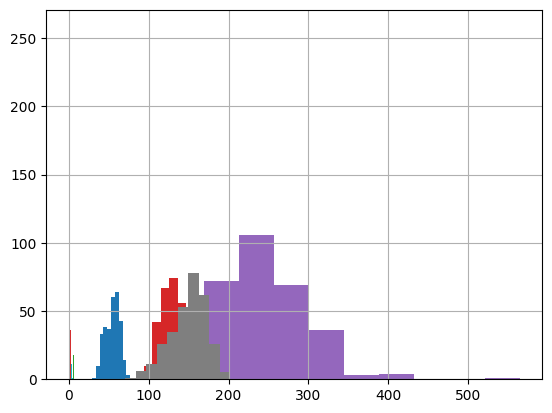

In [9]:
# Get the list of variables of the dataset
variables = data.columns.tolist()
print("Variables in the dataset:")
for var in variables:
    print(var)

# Get a summary of the dataset
summary = data.describe()
print("\nSummary of the dataset:")
print(summary)

# Get the number of observations
num_observations = data.shape[0]
print(f"\nNumber of observations: {num_observations}")

# Get the data types of the variables
data_types = data.dtypes
print("\nData types of the variables:")
print(data_types)

# Get the distribution of the variables
print("\nDistribution of the variables:")
for var in variables:
    print(f"\n{var}:")
    print(data[var].value_counts())
    print(data[var].describe())
    print(data[var].hist())

The dataset contains missing values and have different scales and distributions. For the variables, sex, fbs, exang are binary varialbes, oldpeak is a continuous variable, and the remaining vriables are numeric variables. There are 303 observations in the dataset.

(4)

In [10]:
# Convert the num column to a binary variable
scaled_data['num'] = scaled_data['num'].apply(lambda x: 1 if x > 0 else 0)

(5)


Correlation matrix:
               age       sex        cp  trestbps      chol       fbs  \
age       1.000000 -0.097542  0.104139  0.284946  0.208950  0.118530   
sex      -0.097542  1.000000  0.010084 -0.064456 -0.199915  0.047862   
cp        0.104139  0.010084  1.000000 -0.036077  0.072319 -0.039975   
trestbps  0.284946 -0.064456 -0.036077  1.000000  0.130120  0.175340   
chol      0.208950 -0.199915  0.072319  0.130120  1.000000  0.009841   
fbs       0.118530  0.047862 -0.039975  0.175340  0.009841  1.000000   
restecg   0.148868  0.021647  0.067505  0.146560  0.171043  0.069564   
thalach  -0.393806 -0.048663 -0.334422 -0.045351 -0.003432 -0.007854   
exang     0.091661  0.146201  0.384060  0.064762  0.061310  0.025665   
oldpeak   0.203805  0.102173  0.202277  0.189171  0.046564  0.005747   
slope     0.161770  0.037533  0.152050  0.117382 -0.004062  0.059894   
ca        0.362605  0.093185  0.233214  0.098773  0.119000  0.145478   
thal      0.127389  0.380936  0.265246  0.1

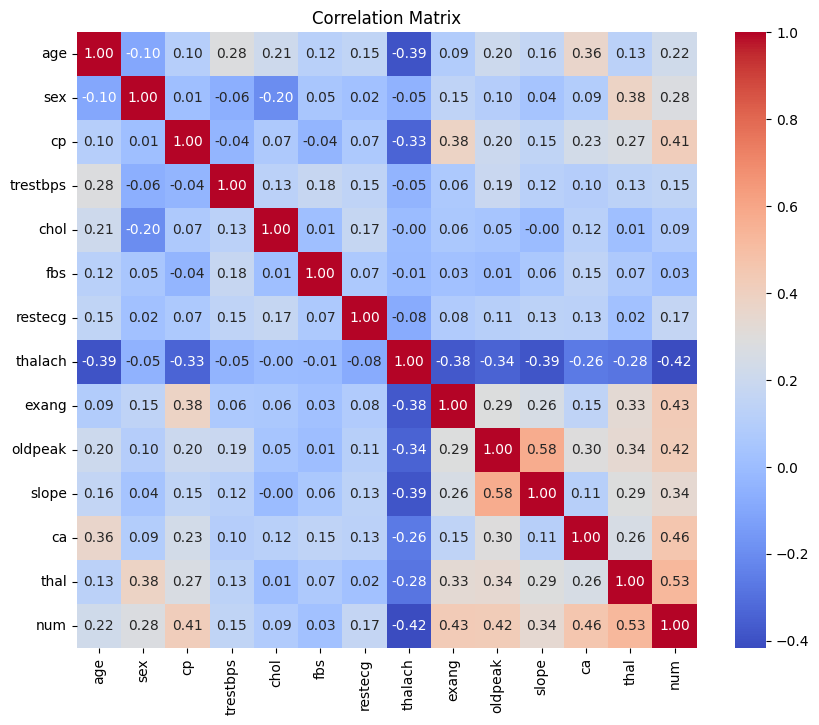

In [11]:
# Correlation matrix
correlation_matrix = scaled_data.corr()
print("\nCorrelation matrix:")
print(correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

From the correlation matrix, we can see that the features are not highly correlated with each other. The top-3 variable with highest correlation with num is thal, ca, and exang.

(6)

In [12]:
scaled_data.dropna(inplace=True)
num_observations_after_drop = scaled_data.shape[0]

print(num_observations_after_drop)

297


There are 297 observations after dropping the missing values.

(7)

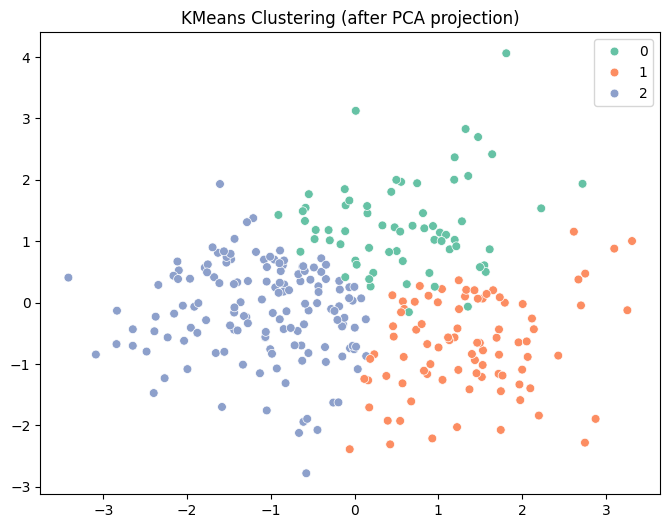

In [13]:

categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'num']
X_cluster = scaled_data.drop(columns = categorical_cols)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)


kmeans = KMeans(n_clusters = 3, random_state = 1) #choose the number of clusters = 3 due to previous knowledge
clusters = kmeans.fit_predict(X_scaled)

pca = PCA(n_components = 2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize = (8,6))
sns.scatterplot(x = X_pca[:, 0], y = X_pca[:, 1], hue = clusters, palette = 'Set2' , s = 40)

plt.title('KMeans Clustering (after PCA projection)')
plt.show()


(8)

In [14]:
X = scaled_data.drop(columns=["num"])
y = scaled_data["num"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")


Training set size: 207
Testing set size: 90


(9)

We select:

1. Logistic Regression

Logistic regression always used for binary classification problems. Because it is really efficiency for small/medium datasets. The structure of it is easy and has great interpretability. In this case we are analysising the heart disease dataset, and by previous knowledge we know logistic regression is suitale for this kind of dataset. So the first one we choose is logistic regression.


2. Decision Tree

Decision tree is a very well understood model that divides data into different categories step by step by constantly making “yes” and “no” judgments on features. It is very easy to operate because we don't need to standardize the data in advance, and it can handle different types of data at the same time. I think its biggest advantage is that it has a clear structure, and it can draw very graphical diagrams to see how to make decisions at each step, which is very helpful for medical data analysis, because the model is very explanatory and easy to understand.  For example, let's judge each item in this data on a finger-by-finger basis.


(10)

We choose accuracy and precision.

1. Accuracy: 

formula when calculating 'Accuracy = (TP + TN) / (TP + TN + FP + FN)'
TP is True Positive, TN is True Negative; FP is False Positive, FN is False Negative.

It is one of the most commonly used metrics to measure the overall performance of a classification model.
It shows how many times the model predicted correctly and what percentage of the total predictions were made.


2. Sensitivity:

Formula when calculating 'Sensitivity = TP / (TP + FN)'  
TP is True Positive, FN is False Negative.

Sensitivity measures how well the model identifies actual positive cases.  In other words,  sensitivity shows what proportion of people who are actually “have problem” were correctly predicted as “have problem/sick” by the model. A high sensitivity means the model is good at detecting all real cases, even sometimes it maybe too sensitive. But if we cannot identify someone is actual "have problem" it may lead to very bad situation.

(11)

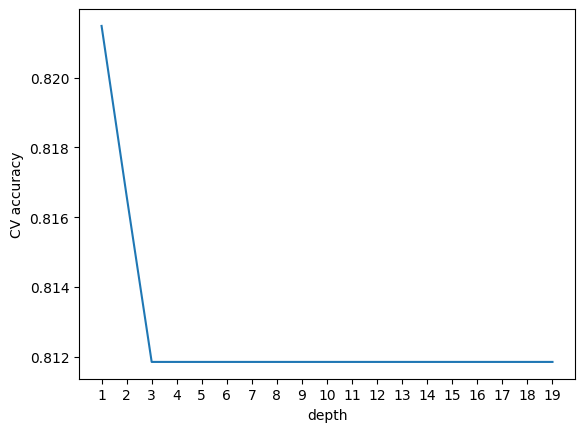

Optimal max_depth:  1


LogisticRegression(C=1, max_iter=120)

In [15]:
# identify optimal tuning parameters using cross validation
depth_range = range(1, 20)
cv_scores = []
for k in depth_range:
    heart_disease_log = LogisticRegression(max_iter=120, C=k)
# 5-fold cross-validation using accuracy
    cv_scores_k = cross_val_score(
        heart_disease_log,
        X_train,
        y_train,
        cv=5,
        scoring='accuracy'
    )
# append the average accuracy across all folds
    cv_scores.append(np.mean(cv_scores_k))
plt.plot(depth_range, cv_scores)
plt.xlabel('depth')
plt.ylabel('CV accuracy')
plt.xticks(range(1,20))
plt.show()

optimal_depth_index = np.argmax(cv_scores)
optimal_depth = depth_range[optimal_depth_index]

print("Optimal max_depth: ", optimal_depth)

# train logistic regression model 
heart_disease_log = LogisticRegression(max_iter=120, C=optimal_depth)
heart_disease_log.fit(X_train, y_train)

The optimal tuning parameter for logistic regression is max depth k: 1.

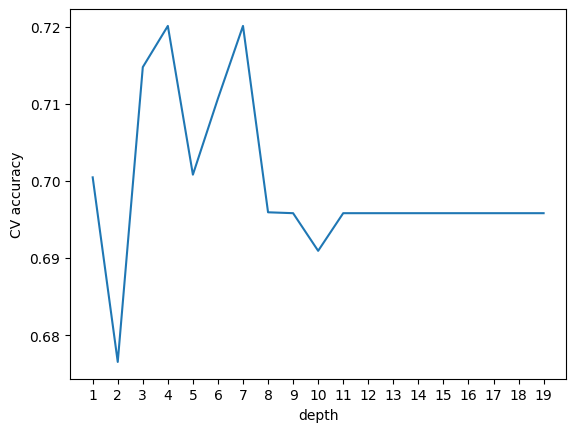

Optimal max_depth:  7


DecisionTreeClassifier(max_depth=3, random_state=0)

In [16]:
# identify optimal tuning parameters using cross validation
depth_range = range(1, 20)
cv_scores = []
for k in depth_range:
    dt = DecisionTreeClassifier(
    criterion='gini', 
    random_state=0,
    max_depth=k
    )

    cv_scores_k = cross_val_score(
        dt,
        X_train,
        y_train,
        cv=5,
        scoring='accuracy'
    )
    cv_scores.append(np.mean(cv_scores_k))
plt.plot(depth_range, cv_scores)
plt.xlabel('depth')
plt.ylabel('CV accuracy')
plt.xticks(range(1,20))
plt.show()

optimal_depth_index = np.argmax(cv_scores)
optimal_depth = depth_range[optimal_depth_index]

print("Optimal max_depth: ", optimal_depth)

# train decision tree model
heart_disease_dt = DecisionTreeClassifier(
    criterion='gini',
    random_state=0,
    max_depth=3
)
heart_disease_dt.fit(X_train, y_train)

The optimal tuning parameter for decision tree is optimal max depth: 7.

(12)

In [17]:
# Apply Step-wise subset selection to descision tree
sfs = SFS(
    estimator=heart_disease_dt,
    k_features=(1, 8),
    forward=True,
    floating=False,
    scoring='accuracy',  
    cv=5,
)
sfs.fit(X_train, y_train)

# identify optimal tuning parameters
selected_features = X_train.columns[list(sfs.k_feature_idx_)]
X_train_sfs = X_train[selected_features]
X_test_sfs = X_test[selected_features]

depth_range = range(1, 20)
cv_scores = []
for k in depth_range:
    dt = DecisionTreeClassifier(
    criterion='gini', 
    random_state=0,
    max_depth=k
    )

    cv_scores_k = cross_val_score(
        dt,
        X_train_sfs,
        y_train,
        cv=5,
        scoring='accuracy'
    )
    cv_scores.append(np.mean(cv_scores_k))

optimal_depth_index = np.argmax(cv_scores)
optimal_depth = depth_range[optimal_depth_index]

print("Optimal max_depth: ", optimal_depth)

# train decision tree model with selected features
m_sfs = DecisionTreeClassifier(
    criterion='gini',
    random_state=0,
    max_depth=optimal_depth
)
m_sfs.fit(X_train_sfs, y_train)


Optimal max_depth:  3


DecisionTreeClassifier(max_depth=3, random_state=0)

The optimal tuning parameter for decision tree is optimal max depth: 3.

(13)

In [18]:
# confusion matrix for logistic regression
y_test_hat = heart_disease_log.predict(X_test)
cm_log = confusion_matrix(y_test, y_test_hat)
total1 = sum(sum(cm_log))
accuracy_log = (cm_log[0,0]+cm_log[1,1])/total1
print("Logistic Regression Accuracy: ", accuracy_log)
sensitivity_log = cm_log[1,1]/(cm_log[1,0]+cm_log[1,1]) 
print("Logistic Regression Sensitivity: ", sensitivity_log)

y_pred_dt = heart_disease_dt.predict(X_test)
# confusion matrix for decision tree
cm_dt = confusion_matrix(y_test, y_pred_dt)
total2 = sum(sum(cm_dt))
accuracy_dt = (cm_dt[0,0]+cm_dt[1,1])/total2
print("Decision Tree Accuracy: ", accuracy_dt)
sensitivity_dt = cm_dt[1,1]/(cm_dt[1,0]+cm_dt[1,1])
print("Decision Tree Sensitivity: ", sensitivity_dt)

y_pred_sfs = m_sfs.predict(X_test_sfs)
# confusion matrix for decision tree with selected features
cm_sfs = confusion_matrix(y_test, y_pred_sfs)
total3 = sum(sum(cm_sfs))
accuracy_sfs = (cm_sfs[0,0]+cm_sfs[1,1])/total3
print("Decision Tree with Selected Features Accuracy: ", accuracy_sfs)
sensitivity_sfs = cm_sfs[1,1]/(cm_sfs[1,0]+cm_sfs[1,1])
print("Decision Tree with Selected Features Sensitivity: ", sensitivity_sfs)

Logistic Regression Accuracy:  0.8444444444444444
Logistic Regression Sensitivity:  0.7619047619047619
Decision Tree Accuracy:  0.7444444444444445
Decision Tree Sensitivity:  0.7857142857142857
Decision Tree with Selected Features Accuracy:  0.7555555555555555
Decision Tree with Selected Features Sensitivity:  0.8095238095238095


The Logistic Regression model has a higher accuracy than the Decision Tree model. However, the Decision Tree model has a higher sensitivity, which means it is better at identifying positive cases. \
Both accuracy and sensitivity for Decision Tree model with SFS are bit higher than the original Decision Tree model. This indicates that feature selection has improved the performance of the classifier.

(14)

/tmp/ipykernel_693798/1559183592.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')


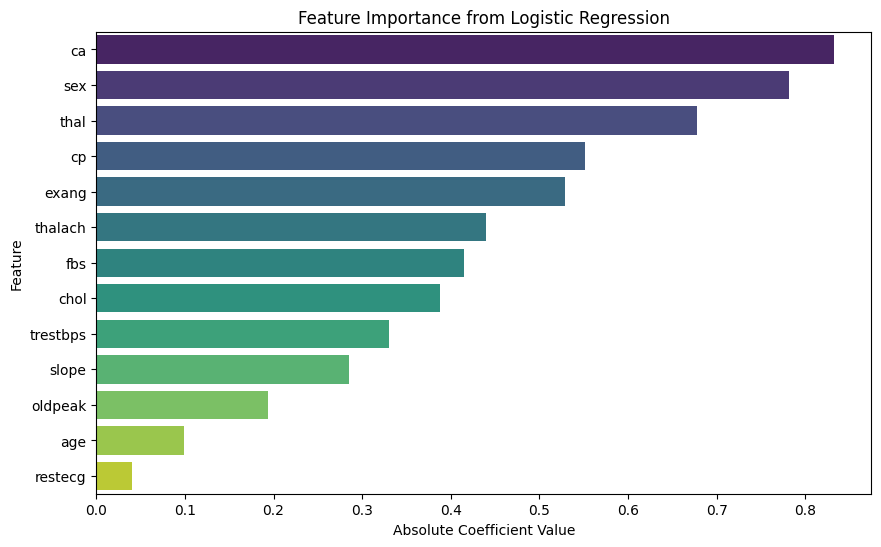

In [19]:
# The best interpretable model identified in (13) is logistic regression.
coefficients = heart_disease_log.coef_[0]
feature_importance = pd.DataFrame(
    {'Feature': X_train.columns,
     'Coefficient': coefficients}
)
feature_importance['Importance'] = np.abs(feature_importance['Coefficient'])
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
plt.title('Feature Importance from Logistic Regression')
plt.xlabel('Absolute Coefficient Value')
plt.ylabel('Feature')
plt.show()

The most important predictor variables is 'ca', which is the number of major vessels (0-3) colored by fluoroscopy. This variable has a positive coefficient, indicating that as the number of major vessels increases, the likelihood of having heart disease also increases. This suggests that individuals with more major vessels are at a higher risk of heart disease.

(15)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.5s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.7s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.9s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.4s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   3.6s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.8s
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estim

/tmp/ipykernel_693798/3033109590.py:54: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_rf, palette='viridis')


Text(0, 0.5, 'Feature')

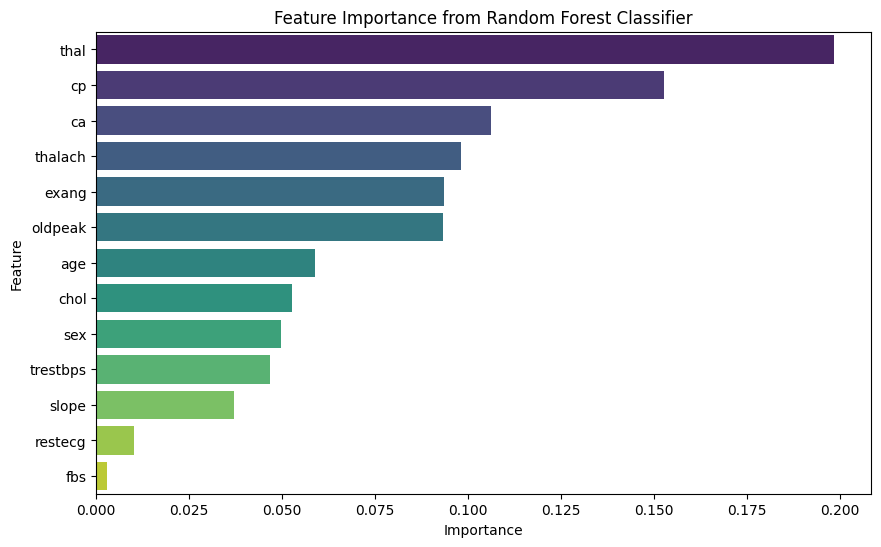

In [20]:
# Using Random Forest Classifier
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           scoring='accuracy', cv=5, verbose=2, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters for Random Forest Classifier:")
print(best_params)

# Train the Random Forest Classifier with the best parameters
rf_best = RandomForestClassifier(**best_params, random_state=42)
rf_best.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_best.predict(X_test)

# Confusion matrix for Random Forest Classifier
cm_rf = confusion_matrix(y_test, y_pred_rf)
total4 = sum(sum(cm_rf))
accuracy_rf = (cm_rf[0,0]+cm_rf[1,1])/total4
print("Random Forest Classifier Accuracy: ", accuracy_rf)
sensitivity_rf = cm_rf[1,1]/(cm_rf[1,0]+cm_rf[1,1])
print("Random Forest Classifier Sensitivity: ", sensitivity_rf)

# Feature importance from Random Forest Classifier
feature_importance_rf = pd.DataFrame(
    {'Feature': X_train.columns,
     'Importance': rf_best.feature_importances_}
)
feature_importance_rf = feature_importance_rf.sort_values(by='Importance', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_rf, palette='viridis')
plt.title('Feature Importance from Random Forest Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')


The improved model is based on the original Decision Tree model with SFS. The original Decision Tree has accuracy:  0.74 and sensitivity:  0.78, and the improved model has accuracy: 0.83 and sensitivity: 0.73. The improved model is trained with no specific max depth, 4 min_samples_leaf, 2 min_samples_split, and 300 estimators.

(16)

Contributions:

Yixin Ma: 11, 12, 13, 14, 15

Runhan Huang: 6, 7, 8, 9, 10

Kunhan Liang: 1, 2, 3, 4, 5, 15

(17)

Link to the public repository: https://github.com/SweetIceLolly/3da-a6

\newpage

# References

GitHub Copilot was used as a code assistant for some of the questions.